In [15]:
import pandas as pd

In [16]:
df = pd.read_csv(r"C:\Users\rishab\Downloads\netflix1.csv")

In [17]:
print("Shape of dataset:", df.shape)

Shape of dataset: (8790, 10)


In [18]:
print(df.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


In [8]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [10]:
print("Country value counts (top 5):")
print(df['country'].value_counts().head(10))

print("\nDirector value counts (top 5):")
print(df['director'].value_counts().head(10))

Country value counts (top 5):
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64

Director value counts (top 5):
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64


In [11]:
import numpy as np

In [12]:
df['country'] = df['country'].replace('Not Given', np.nan)
df['director'] = df['director'].replace('Not Given', np.nan)


In [13]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64


In [14]:
df = df.dropna(subset=['country'])

In [15]:
print("New shape after dropping rows with missing country:", df.shape)
print("Remaining nulls:\n", df.isnull().sum())

New shape after dropping rows with missing country: (8503, 10)
Remaining nulls:
 show_id            0
type               0
title              0
director        2588
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64


In [16]:
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")


Number of duplicate rows: 0


In [17]:
df = df.drop_duplicates()

In [18]:
print("Shape after dropping duplicates:", df.shape)


Shape after dropping duplicates: (8503, 10)


In [19]:
df['date_added'] = pd.to_datetime(df['date_added'])


In [20]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [21]:
print(df[['date_added', 'year_added', 'month_added', 'day_added']].head())


  date_added  year_added  month_added  day_added
0 2021-09-25        2021            9         25
1 2021-09-24        2021            9         24
2 2021-09-24        2021            9         24
3 2021-09-22        2021            9         22
4 2021-09-24        2021            9         24


In [22]:
df['duration_unit'] = df['duration'].apply(lambda x: x.split()[-1]) 
df['duration_int'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [23]:
print(df[['type', 'duration', 'duration_int', 'duration_unit']].head(10))

      type   duration  duration_int duration_unit
0    Movie     90 min            90           min
1  TV Show   1 Season             1        Season
2  TV Show   1 Season             1        Season
3    Movie     91 min            91           min
4    Movie    125 min           125           min
5  TV Show  9 Seasons             9       Seasons
6    Movie    104 min           104           min
7    Movie     87 min            87           min
8    Movie    127 min           127           min
9    Movie     76 min            76           min


In [24]:
df['genres_list'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])
df['num_genres'] = df['genres_list'].apply(len)


In [25]:
print(df[['title', 'listed_in', 'genres_list', 'num_genres']].head())

                              title  \
0              Dick Johnson Is Dead   
1                         Ganglands   
2                     Midnight Mass   
3  Confessions of an Invisible Girl   
4                           Sankofa   

                                           listed_in  \
0                                      Documentaries   
1  Crime TV Shows, International TV Shows, TV Act...   
2                 TV Dramas, TV Horror, TV Mysteries   
3                 Children & Family Movies, Comedies   
4   Dramas, Independent Movies, International Movies   

                                         genres_list  num_genres  
0                                    [Documentaries]           1  
1  [Crime TV Shows, International TV Shows, TV Ac...           3  
2               [TV Dramas, TV Horror, TV Mysteries]           3  
3               [Children & Family Movies, Comedies]           2  
4  [Dramas, Independent Movies, International Mov...           3  


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
type_counts = df['type'].value_counts()

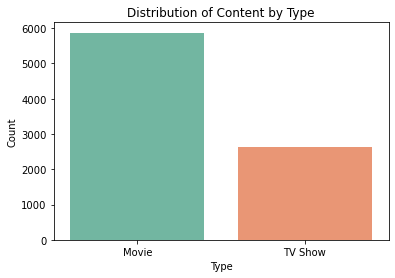

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

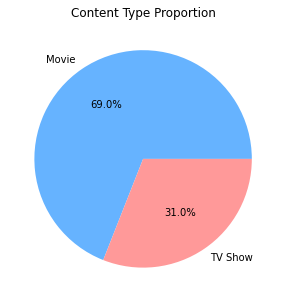

In [32]:
plt.figure(figsize=(5,5))
plt.pie(type_counts, labels=type_counts.index, autopct='%.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Content Type Proportion')
plt.show()

In [33]:
top_countries = df['country'].value_counts().head(10)

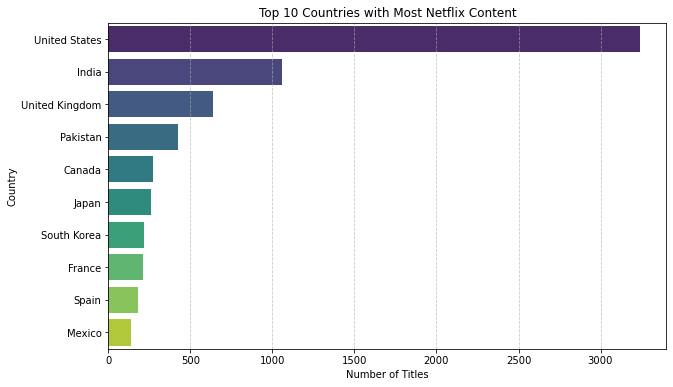

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [35]:
all_genres = df.explode('genres_list')

In [36]:
genre_counts = all_genres['genres_list'].value_counts().head(10)


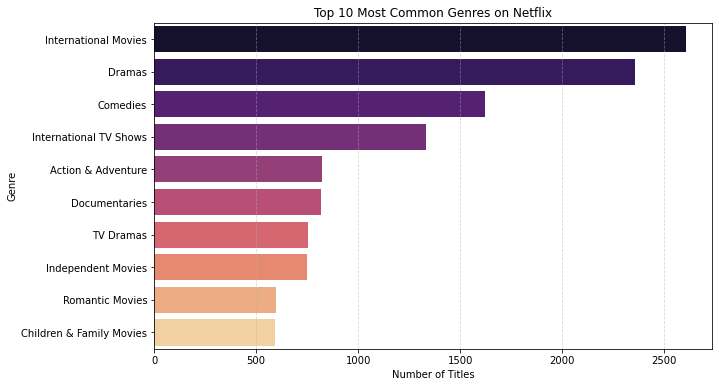

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [38]:
director_counts = df['director'].dropna().value_counts().head(10)

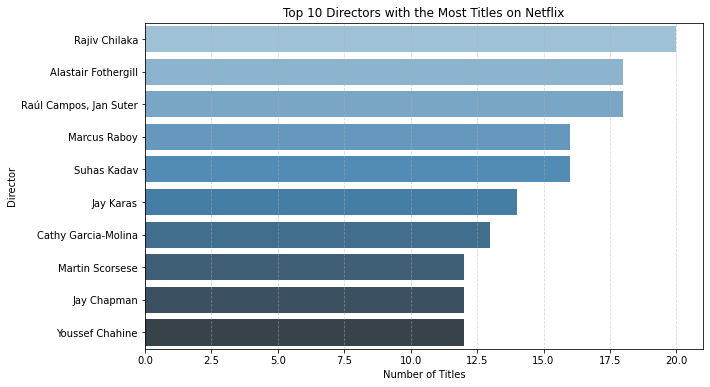

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [40]:
year_counts = df['year_added'].value_counts().sort_index()

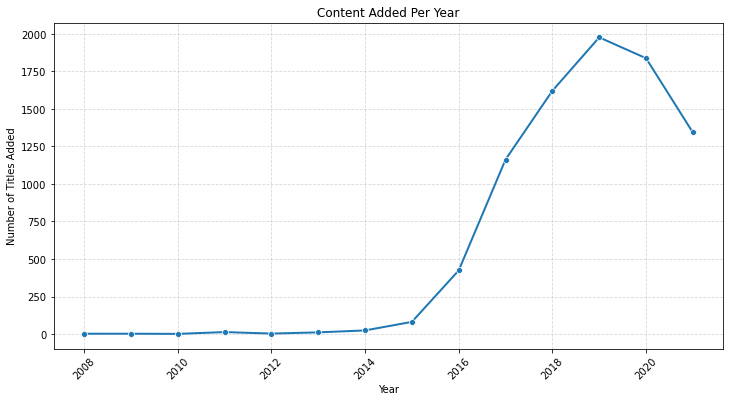

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', linewidth=2)
plt.title('Content Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

In [42]:
month_counts = df['month_added'].value_counts().sort_index()

In [43]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

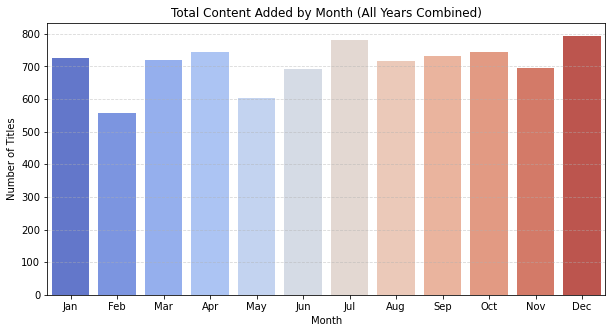

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=months, y=month_counts.values, palette='coolwarm')
plt.title('Total Content Added by Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [45]:
rating_counts = df['rating'].value_counts().head(10)

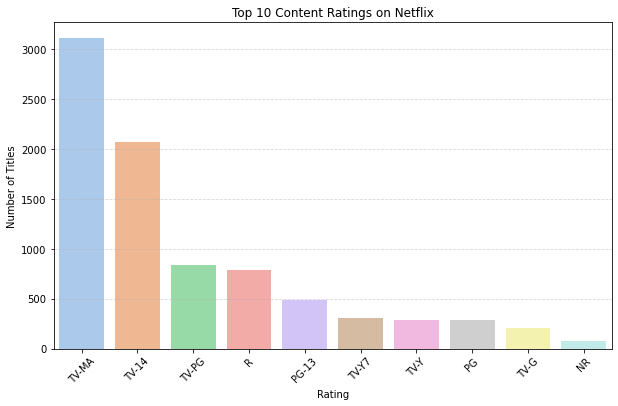

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')
plt.title('Top 10 Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [20]:
df['content_age'] = 2025 - df['release_year']

In [21]:
print(df[['title', 'release_year', 'content_age']].head())


                              title  release_year  content_age
0              Dick Johnson Is Dead          2020            5
1                         Ganglands          2021            4
2                     Midnight Mass          2021            4
3  Confessions of an Invisible Girl          2021            4
4                           Sankofa          1993           32


In [25]:
df['genres_list'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])
df['num_genres'] = df['genres_list'].apply(len)

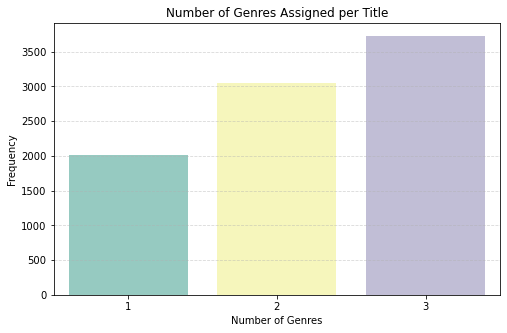

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='num_genres', data=df, palette='Set3')
plt.title('Number of Genres Assigned per Title')
plt.xlabel('Number of Genres')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [27]:
df['duration_unit'] = df['duration'].apply(lambda x: x.split()[-1])
df['duration_int'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [28]:
avg_movie_duration = df[df['type'] == 'Movie']['duration_int'].mean()

In [30]:
avg_tv_seasons = df[df['type'] == 'TV Show']['duration_int'].mean()

print(f"Average Movie Duration: {round(avg_movie_duration)} minutes")
print(f"Average Number of TV Show Seasons: {round(avg_tv_seasons, 1)}")

Average Movie Duration: 100 minutes
Average Number of TV Show Seasons: 1.8


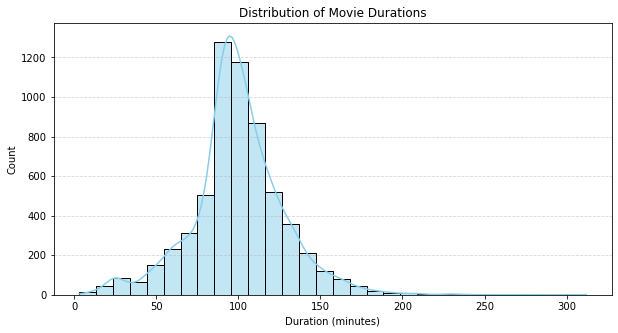

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['type'] == 'Movie']['duration_int'], bins=30, color='skyblue', kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [36]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [37]:
df['year_added'] = df['date_added'].dt.year

In [38]:
df['time_to_netflix'] = df['year_added'] - df['release_year']
print(df[['title', 'release_year', 'year_added', 'time_to_netflix']].head())

                              title  release_year  year_added  time_to_netflix
0              Dick Johnson Is Dead          2020        2021                1
1                         Ganglands          2021        2021                0
2                     Midnight Mass          2021        2021                0
3  Confessions of an Invisible Girl          2021        2021                0
4                           Sankofa          1993        2021               28
